<h1> DROWSINESS DETECTION </h1>

In [2]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

<h2>Loading Data Set</h2>

In [5]:
training_set=train_datagen.flow_from_directory('yawn_eye/dataset_new/train',
                                              target_size=(24,24),
                                              batch_size=32,
                                              class_mode='binary')

Found 2467 images belonging to 4 classes.


In [6]:
test_set = test_datagen.flow_from_directory('yawn_eye/dataset_new/test',
                                           target_size=(24,24),
                                           batch_size=32,
                                           class_mode='binary')

Found 433 images belonging to 4 classes.


<h2>Building Model using CNN</h2>

In [7]:
cnn = Sequential()

In [8]:
cnn.add(Conv2D(filters=32, kernel_size=(3,3),padding="same",activation="relu", input_shape=[24,24,3]))

In [9]:
cnn.add(MaxPooling2D(pool_size=1,strides=2,padding="valid"))

In [10]:
#cnn.add(Dropout(0.2))

In [11]:
cnn.add(Conv2D(filters=32, kernel_size=(3,3),padding="same",activation="relu"))
cnn.add(MaxPooling2D(pool_size=1,strides=2,padding="valid"))

In [12]:
#cnn.add(Dropout(0.2))

In [13]:
cnn.add(Flatten())

In [14]:
cnn.add(Dense(units=128, activation='relu'))

In [15]:
#cnn.add(Dropout(0.2))

In [16]:
cnn.add(Dense(units=4, activation='softmax'))

In [17]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.fit_generator(training_set,
                 steps_per_epoch = 78,
                 epochs=15,
                 validation_data=test_set,
                 validation_steps=14)

Epoch 1/15
78/78 [==============================] - 213s 3s/step - loss: 0.7856 - accuracy: 0.6526 - val_loss: 0.5502 - val_accuracy: 0.6790
Epoch 2/15
78/78 [==============================] - 11s 145ms/step - loss: 0.4896 - accuracy: 0.7726 - val_loss: 0.4283 - val_accuracy: 0.7621
Epoch 3/15
78/78 [==============================] - 13s 161ms/step - loss: 0.4221 - accuracy: 0.7925 - val_loss: 0.3090 - val_accuracy: 0.7968
Epoch 4/15
78/78 [==============================] - 12s 155ms/step - loss: 0.3917 - accuracy: 0.8058 - val_loss: 0.3212 - val_accuracy: 0.8083
Epoch 5/15
78/78 [==============================] - 13s 161ms/step - loss: 0.3615 - accuracy: 0.8164 - val_loss: 0.2508 - val_accuracy: 0.8291
Epoch 6/15
78/78 [==============================] - 12s 159ms/step - loss: 0.3440 - accuracy: 0.8253 - val_loss: 0.2727 - val_accuracy: 0.8245
Epoch 7/15
78/78 [==============================] - 12s 154ms/step - loss: 0.3363 - accuracy: 0.8249 - val_loss: 0.2686 - val_accuracy: 0.7945
E

In [19]:
#Saving the model
cnn.save('CNN_DD.h5', overwrite=True)

In [20]:
training_set.class_indices

{'Closed': 0, 'Open': 1, 'no_yawn': 2, 'yawn': 3}

<h2>Testing the model by uploading an image</h2>

[[0. 0. 0. 1.]]


'yawn'

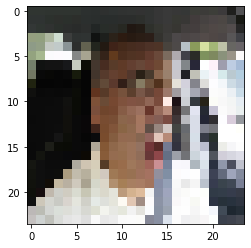

In [22]:
test_image = image.load_img('yawn_eye/dataset_new/test/yawn/286.jpg', target_size = (24,24))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Closed'
elif result[0][1] == 1:
    prediction = 'Open'
elif result[0][2] == 1:
    prediction = 'no yawn'
else:
    prediction = 'yawn'
prediction